# Perceptron
Notice `Linear` that happened to show in task

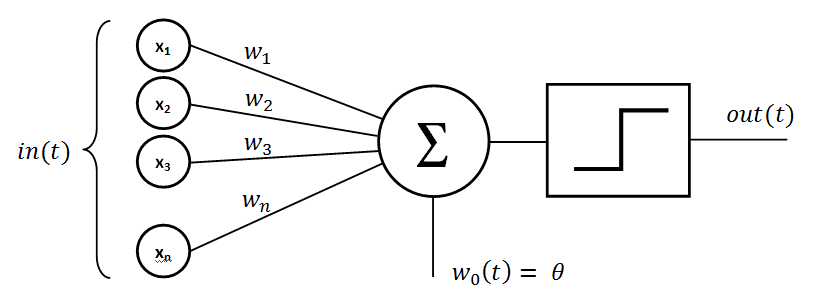

### Create a Perceptron (See task answer)

# Cicles Classification Problem

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [ ]:
n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [ ]:
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"Train Shape: {X_train.shape} | Test Shape: {X_test.shape}")


In [ ]:
import torch.nn as nn
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)
        self.relu = nn.ReLU()
    def forward(self, x):
        return torch.squeeze(self.fc3(self.relu(self.fc2(self.relu(self.fc1(x))))))

In [ ]:
model: nn.Module = CircleModel()
print(model)

In [ ]:
import torch.optim as optim
loss_function = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
from helper_functions import plot_decision_boundary

def plot_boundaries(
    model: nn.Module,
    train_data: torch.Tensor = X_train,
    train_labels: torch.Tensor = y_train,
    test_data: torch.Tensor = X_test,
    test_labels: torch.Tensor = y_test,
    ):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.title("Train")
    plot_decision_boundary(model, train_data, train_labels)
    plt.subplot(1, 2, 2)
    plt.title("Test")
    plot_decision_boundary(model, test_data, test_labels)

def train(
        model: nn.Module,
        loss_function: nn.Module = loss_function,
        optimizer: optim.Optimizer = optimizer,
        train_data: torch.Tensor = X_train,
        train_labels: torch.Tensor = y_train,
        test_data: torch.Tensor = X_test,
        test_labels: torch.Tensor = y_test,
        num_epochs: int = 100,
    ):
    epochs_count, train_loss_arr, test_loss_arr = [], [], []
    for epoch in range(num_epochs):
        model.train()

        y_preds = model(train_data)

        loss = loss_function(y_preds, train_labels)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        model.eval()
        with torch.inference_mode():
            y_preds = model(test_data)
            test_loss = loss_function(y_preds, test_labels)

            if epoch % 10 == 0:
                epochs_count.append(epoch)
                train_loss_arr.append(loss.detach().numpy())
                test_loss_arr.append(test_loss.detach().numpy())
                print(f"Epoch {epoch}: train loss {loss}, test loss {test_loss}")
    return epochs_count, train_loss_arr, test_loss_arr


def predict(model: nn.Module, data: torch.Tensor) -> torch.Tensor:
    model.eval()
    with torch.inference_mode():
        return model(data)
    
def plot_stats(
        epochs: list,
        train_loss: list,
        test_loss: list,
    ):
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_loss, label='Train loss')
    plt.plot(epochs, test_loss, label='Test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [ ]:
plot_boundaries(model)

In [ ]:
epochs_count, train_loss, test_loss = train(model, num_epochs=1000)

In [ ]:
plot_stats(epochs=epochs_count, train_loss=train_loss, test_loss=test_loss)


In [ ]:
plot_boundaries(model)

In [ ]:
from torchmetrics import Accuracy

accuracy = Accuracy(task="binary")

with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model(X_test))).squeeze()

accuracy(y_preds, y_test)

# <font color="green">MNist Solver Exercice</font>

# Terminologies & Recap
1. **Activation Function**: A function that decides whether a neuron should be activated or not by calculating the weighted sum and further adding bias with it. The purpose of the activation function is to introduce non-linearity into the output of a neuron.


2. **Overfitting**: Overfitting occurs when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data.
3. **Underfitting**: Underfitting occurs when a model is too simple to learn the underlying structure of the data.